In [6]:
import pandas as pd

df = pd.read_csv("data\\ehr\\train.csv")

df = df[df.FLAG_mostRecent==1]
df['Date deces'] = df['Date deces'].apply(lambda x: str(x)[:4]+"-"+str(x)[4:6]+"-"+str(x)[6:])
df['Date cr'] = df['Date cr'].apply(lambda x: str(x)[:4]+"-"+str(x)[4:6]+"-"+str(x)[6:])

df.head(5)

,MyIndice,Noigr,Date cr,Date deces,Date entree etude,FLAG_mostRecent,State,Texte
3,3,94410319,1999-11-16,1999-12-03,19991116,1,0,Compte-rendu de consultation ContenuPatient vu...
9,9,89422907,2000-04-27,2001-05-06,20000523,1,1,Compte-rendu de consultation ContenuPatient vu...
14,14,21401986,2000-08-02,2000-11-16,20000808,1,1,Compte-rendu de consultation ContenuPatient vu...
17,17,43349038,2000-10-03,2003-06-02,20001103,1,1,Compte-rendu de consultation ContenuPatient vu...
18,18,37434318,2000-10-04,2001-01-16,20001017,1,1,Compte-rendu de consultation ContenuPatient vu...


([<matplotlib.axis.XTick at 0x268a86250c8>,
 [Text(0, 0, 'Dead/Stop'), Text(1, 0, 'Alive')])

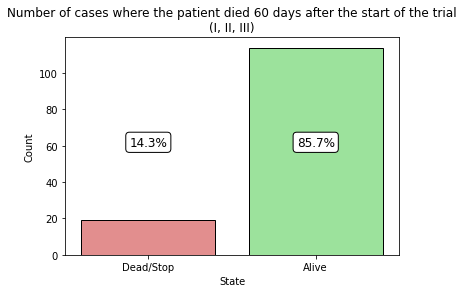

In [8]:
# Plot number of CR dead 60 days following CR
import matplotlib.pyplot as plt
import seaborn as sns

# Compute % of alive and dead
per_dead, per_alive = round((df['State'].value_counts(normalize=True)*100)[0], 1), round((df['State'].value_counts(normalize=True)*100)[1], 1)

sns.countplot(x="State", data=df, palette=['lightcoral',"lightgreen"], edgecolor="black")

plt.text(0, 60, str(per_dead)+"%", ha="center", size = 12, bbox=dict(boxstyle="round",
                                                                                facecolor="white",
                                                                                edgecolor="black"
                                                                                ))
plt.text(1, 60, str(per_alive)+"%", ha="center", size = 12, bbox=dict(boxstyle="round",
                                                                                facecolor="white",
                                                                                edgecolor="black"
                                                                                ))

plt.title("Number of cases where the patient died 60 days after the start of the trial\n(I, II, III)", fontsize=12)
plt.ylabel('Count')        
plt.xticks([0,1], ['Dead/Stop', 'Alive'])